Cross Layer Transcoder demo on OpenVLA

In [1]:

import torch
from transformers import AutoModelForVision2Seq, AutoProcessor

model_checkpoint = "openvla/openvla-7b"

processor = AutoProcessor.from_pretrained(model_checkpoint, trust_remote_code=True)

openvla = AutoModelForVision2Seq.from_pretrained(
    model_checkpoint,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True,
    device_map={"": 0},   # use GPU
)

openvla.eval()

print("loaded. allocated GB:", torch.cuda.memory_allocated()/1e9)
print("reserved  GB:", torch.cuda.memory_reserved()/1e9)
print("free,total:", torch.cuda.mem_get_info())


/home/harvardair/miniconda3/envs/openvla/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026-01-14 19:04:53.030640: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-14 19:04:53.058555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-14 19:04:53.058574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-14

loaded. allocated GB: 15.129042944
reserved  GB: 15.17289472
free,total: (17274765312, 33671479296)



/home/harvardair/miniconda3/envs/openvla/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Found 4 TFRecord files:
  - stack_d4_ep100-train.tfrecord-00000-of-00004
  - stack_d4_ep100-train.tfrecord-00001-of-00004
  - stack_d4_ep100-train.tfrecord-00002-of-00004
  - stack_d4_ep100-train.tfrecord-00003-of-00004
Loading from stack_d4_ep100-train.tfrecord-00000-of-00004...
  Loaded 25 samples from stack_d4_ep100-train.tfrecord-00000-of-00004
Loading from stack_d4_ep100-train.tfrecord-00001-of-00004...
  Loaded 25 samples from stack_d4_ep100-train.tfrecord-00001-of-00004
Loading from stack_d4_ep100-train.tfrecord-00002-of-00004...


2026-01-14 19:05:03.831595: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-01-14 19:05:03.832821: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


  Loaded 25 samples from stack_d4_ep100-train.tfrecord-00002-of-00004
Loading from stack_d4_ep100-train.tfrecord-00003-of-00004...
  Loaded 25 samples from stack_d4_ep100-train.tfrecord-00003-of-00004
Loaded 100 samples

Training CLT
GROUP: Vision Featurizer (ViT-1024)
  Layers: 24 (1024→1024)
Training fresh CLT system...
Training CLT...
Freezing base model's weights for CLT training
Set Optimizer for CLT parameters. Total number of CLT params: 21261312
Training on cuda

Training CLT System



Epoch 1/10: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s, loss=12.120744]


Epoch 1/10 avg total loss: 29.725498


Epoch 2/10: 100%|██████████| 13/13 [00:03<00:00,  3.76it/s, loss=7.265432]


Epoch 2/10 avg total loss: 8.662353


Epoch 3/10: 100%|██████████| 13/13 [00:03<00:00,  3.76it/s, loss=6.246140]


Epoch 3/10 avg total loss: 6.609228


Epoch 4/10: 100%|██████████| 13/13 [00:03<00:00,  3.76it/s, loss=5.924634]


Epoch 4/10 avg total loss: 6.016465


Epoch 5/10: 100%|██████████| 13/13 [00:03<00:00,  3.78it/s, loss=5.516034]


Epoch 5/10 avg total loss: 5.662362


Epoch 6/10: 100%|██████████| 13/13 [00:03<00:00,  3.77it/s, loss=5.177108]


Epoch 6/10 avg total loss: 5.328211


Epoch 7/10: 100%|██████████| 13/13 [00:03<00:00,  3.79it/s, loss=4.716899]


Epoch 7/10 avg total loss: 4.914830


Epoch 8/10: 100%|██████████| 13/13 [00:03<00:00,  3.81it/s, loss=4.202031]


Epoch 8/10 avg total loss: 4.418986


Epoch 9/10: 100%|██████████| 13/13 [00:03<00:00,  3.83it/s, loss=3.755483]


Epoch 9/10 avg total loss: 3.950755


Epoch 10/10: 100%|██████████| 13/13 [00:03<00:00,  3.82it/s, loss=3.375077]


Epoch 10/10 avg total loss: 3.533059
Training complete!
Analyzing activations...
Processed 10 batches
Analyzed 100 samples across 24 layers
Saved CLT checkpoint to outputs/clt_vision_featurizer.pt
Saved to outputs/clt_vision_featurizer.pt
Saved figure to outputs/vision_featurizer_activations.png


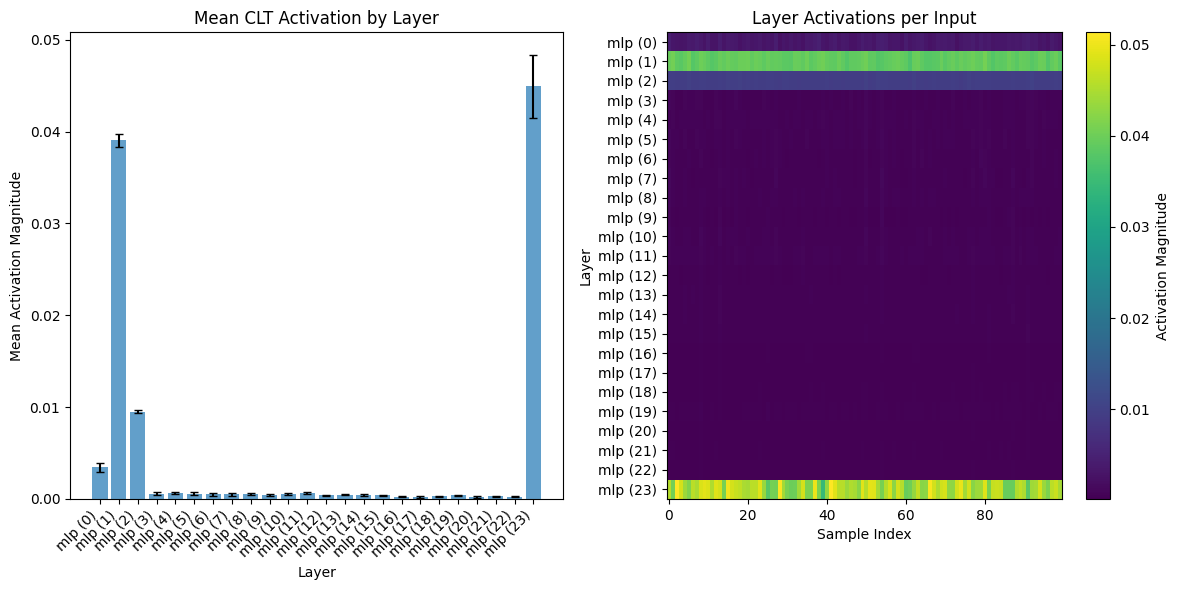

Saved plot to outputs/vision_featurizer_activations.png
Saved peak plot to outputs/vision_featurizer_peak_activations.png
GROUP: Fused Featurizer (ViT-1152)
  Layers: 27 (1152→1152)
Training fresh CLT system...
Training CLT...
Freezing base model's weights for CLT training
Set Optimizer for CLT parameters. Total number of CLT params: 29894400
Training on cuda

Training CLT System



Epoch 1/10: 100%|██████████| 13/13 [00:03<00:00,  3.56it/s, loss=13.046397] 


Epoch 1/10 avg total loss: 196.381457


Epoch 2/10: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s, loss=11.088756]


Epoch 2/10 avg total loss: 11.723124


Epoch 3/10: 100%|██████████| 13/13 [00:03<00:00,  3.62it/s, loss=10.826120]


Epoch 3/10 avg total loss: 10.951961


Epoch 4/10: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s, loss=10.051174]


Epoch 4/10 avg total loss: 10.484592


Epoch 5/10: 100%|██████████| 13/13 [00:03<00:00,  3.62it/s, loss=9.222739]


Epoch 5/10 avg total loss: 9.808754


Epoch 6/10: 100%|██████████| 13/13 [00:03<00:00,  3.62it/s, loss=8.013108]


Epoch 6/10 avg total loss: 8.650165


Epoch 7/10: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s, loss=6.856381]


Epoch 7/10 avg total loss: 7.321241


Epoch 8/10: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s, loss=5.772415]


Epoch 8/10 avg total loss: 6.117621


Epoch 9/10: 100%|██████████| 13/13 [00:03<00:00,  3.62it/s, loss=4.850620]


Epoch 9/10 avg total loss: 5.186411


Epoch 10/10: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s, loss=4.210668]


Epoch 10/10 avg total loss: 4.515981
Training complete!
Analyzing activations...
Processed 10 batches
Analyzed 100 samples across 27 layers
Saved CLT checkpoint to outputs/clt_fused_featurizer.pt
Saved to outputs/clt_fused_featurizer.pt
Saved figure to outputs/fused_featurizer_activations.png


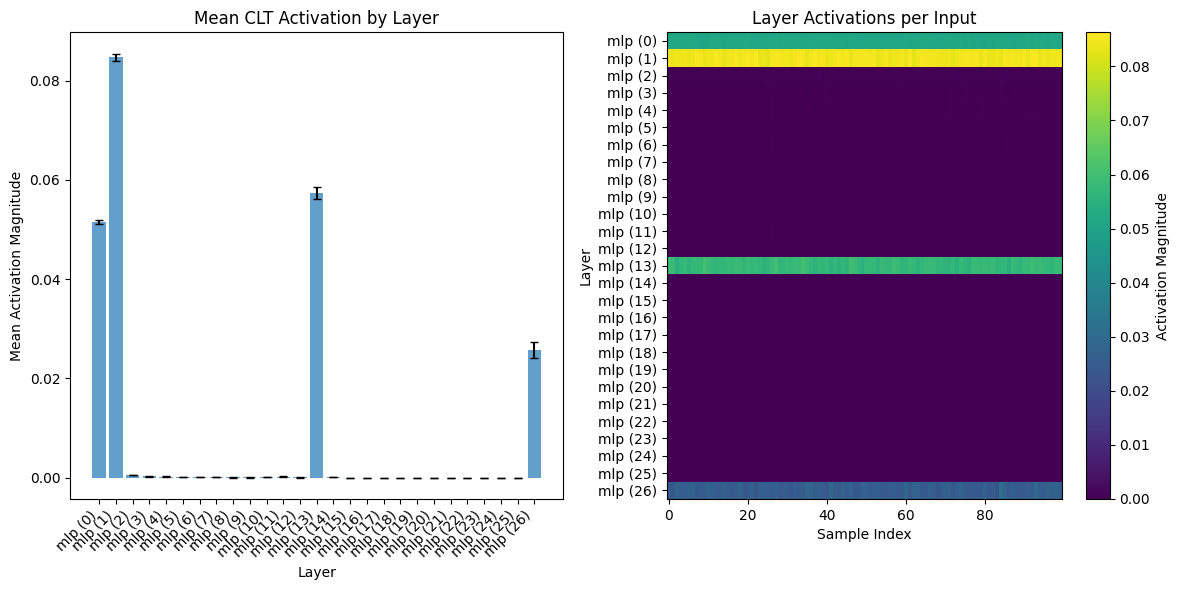

Saved plot to outputs/fused_featurizer_activations.png
Saved peak plot to outputs/fused_featurizer_peak_activations.png
GROUP: Vision-Language Projector
  Layers: 1 (2176→4096)
Training fresh CLT system...
Training CLT...
Freezing base model's weights for CLT training
Set Optimizer for CLT parameters. Total number of CLT params: 405632
Training on cuda

Training CLT System



Epoch 1/10: 100%|██████████| 13/13 [00:02<00:00,  4.62it/s, loss=0.254860]


Epoch 1/10 avg total loss: 0.969662


Epoch 2/10: 100%|██████████| 13/13 [00:02<00:00,  4.67it/s, loss=0.245548]


Epoch 2/10 avg total loss: 0.250705


Epoch 3/10: 100%|██████████| 13/13 [00:02<00:00,  4.68it/s, loss=0.253491]


Epoch 3/10 avg total loss: 0.246709


Epoch 4/10: 100%|██████████| 13/13 [00:02<00:00,  4.63it/s, loss=0.237243]


Epoch 4/10 avg total loss: 0.242322


Epoch 5/10: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s, loss=0.234687]


Epoch 5/10 avg total loss: 0.238634


Epoch 6/10: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s, loss=0.245777]


Epoch 6/10 avg total loss: 0.235647


Epoch 7/10: 100%|██████████| 13/13 [00:02<00:00,  4.64it/s, loss=0.220497]


Epoch 7/10 avg total loss: 0.231445


Epoch 8/10: 100%|██████████| 13/13 [00:02<00:00,  4.59it/s, loss=0.235122]


Epoch 8/10 avg total loss: 0.228951


Epoch 9/10: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s, loss=0.226858]


Epoch 9/10 avg total loss: 0.225760


Epoch 10/10: 100%|██████████| 13/13 [00:02<00:00,  4.63it/s, loss=0.222834]


Epoch 10/10 avg total loss: 0.222907
Training complete!
Analyzing activations...
Processed 10 batches
Analyzed 100 samples across 1 layers
Saved CLT checkpoint to outputs/clt_projector.pt
Saved to outputs/clt_projector.pt
Saved figure to outputs/projector_activations.png


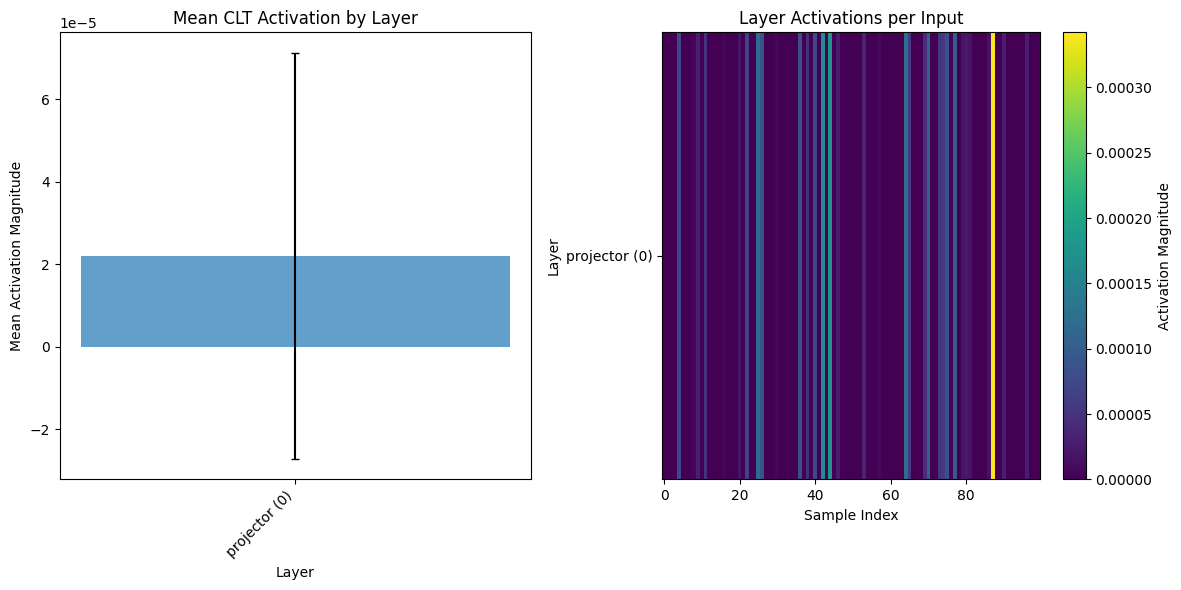

Saved plot to outputs/projector_activations.png
Saved peak plot to outputs/projector_peak_activations.png
GROUP: Language Model (Llama)
  Layers: 32 (4096→4096)
Training fresh CLT system...
Training CLT...
Freezing base model's weights for CLT training
Set Optimizer for CLT parameters. Total number of CLT params: 146935808
Training on cuda

Training CLT System



Epoch 1/10: 100%|██████████| 13/13 [00:04<00:00,  2.94it/s, loss=20.538984]


Epoch 1/10 avg total loss: 21.763822


Epoch 2/10: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s, loss=20.500988]


Epoch 2/10 avg total loss: 20.535137


Epoch 3/10: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s, loss=20.568485]


Epoch 3/10 avg total loss: 20.492982


Epoch 4/10: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s, loss=20.437456]


Epoch 4/10 avg total loss: 20.438711


Epoch 5/10: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s, loss=20.314972]


Epoch 5/10 avg total loss: 20.353408


Epoch 6/10: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s, loss=20.192322]


Epoch 6/10 avg total loss: 20.264357


Epoch 7/10: 100%|██████████| 13/13 [00:04<00:00,  2.91it/s, loss=20.082029]


Epoch 7/10 avg total loss: 20.145497


Epoch 8/10: 100%|██████████| 13/13 [00:04<00:00,  2.93it/s, loss=20.095819]


Epoch 8/10 avg total loss: 20.034968


Epoch 9/10: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s, loss=20.007818]


Epoch 9/10 avg total loss: 19.910612


Epoch 10/10: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s, loss=19.738493]


Epoch 10/10 avg total loss: 19.770023
Training complete!
Analyzing activations...
Processed 10 batches
Analyzed 100 samples across 32 layers
Saved CLT checkpoint to outputs/clt_language_model.pt
Saved to outputs/clt_language_model.pt
Saved figure to outputs/language_model_activations.png


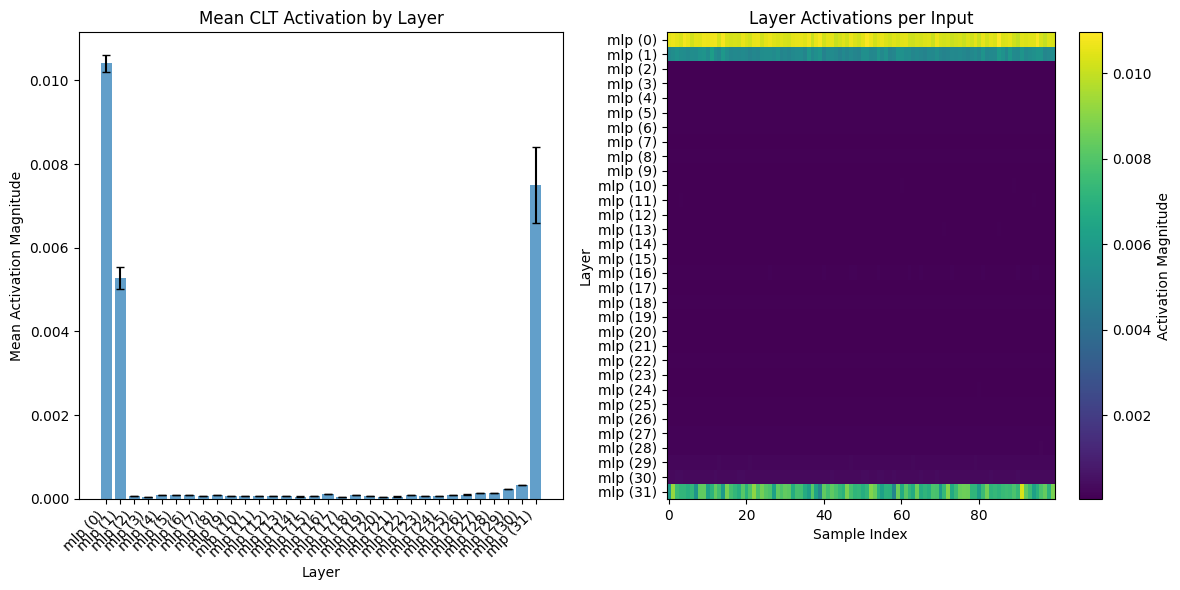

Saved plot to outputs/language_model_activations.png
Saved peak plot to outputs/language_model_peak_activations.png

Vision Featurizer (ViT-1024):
  Mean activations per layer:
    Layer 0: 0.003423
    Layer 1: 0.039057
    Layer 2: 0.009507
    Layer 3: 0.000591
    Layer 4: 0.000610
    ...
    Layer 23: 0.044946
  Most active layer: 23 (mean: 0.044946)

Fused Featurizer (ViT-1152):
  Mean activations per layer:
    Layer 0: 0.051434
    Layer 1: 0.084661
    Layer 2: 0.000529
    Layer 3: 0.000246
    Layer 4: 0.000222
    ...
    Layer 26: 0.025723
  Most active layer: 1 (mean: 0.084661)

Vision-Language Projector:
  Mean activations per layer:
    Layer 0: 0.000022
  Most active layer: 0 (mean: 0.000022)

Language Model (Llama):
  Mean activations per layer:
    Layer 0: 0.010407
    Layer 1: 0.005285
    Layer 2: 0.000078
    Layer 3: 0.000042
    Layer 4: 0.000087
    ...
    Layer 31: 0.007494
  Most active layer: 0 (mean: 0.010407)


In [2]:
import os
import tensorflow as tf
import torch
import gc
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from utils.CLTModel import CLTModel
from utils.clt import CrossLayerTranscoderSystem

torch.cuda.empty_cache()
gc.collect()

# 0. Load and save paths, Set to None to train fresh
LOAD_CHECKPOINT_PATH = None  # "outputs/clt_language_model.pt" or None

# Set to None to disable saving, or a directory to save into
SAVE_DIR = "outputs"         # e.g. "outputs" or None

# 1. DATASET
class TFRecordVLADataset(Dataset):
    def __init__(self, tfrecord_dir: str, processor, split='train'):
        self.processor = processor
        self.split = split

        tfrecord_path = Path(tfrecord_dir)
        pattern = f"*{split}.tfrecord-*"
        self.tfrecord_files = sorted(tfrecord_path.glob(pattern))

        if not self.tfrecord_files:
            raise ValueError(f"No TFRecord files found")

        print(f"Found {len(self.tfrecord_files)} TFRecord files:")
        for f in self.tfrecord_files:
            print(f"  - {f.name}")

        self.samples = []
        self._load_all_samples()
        print(f"Loaded {len(self.samples)} samples\n")

    def _load_all_samples(self):
        for tfrecord_file in self.tfrecord_files:
            print(f"Loading from {tfrecord_file.name}...")
            dataset = tf.data.TFRecordDataset(str(tfrecord_file))

            count = 0
            for raw_record in dataset:
                example = tf.train.Example()
                example.ParseFromString(raw_record.numpy())

                image_bytes = example.features.feature['steps/observation/image'].bytes_list.value[0]
                image = tf.image.decode_image(image_bytes).numpy()

                instruction_bytes = example.features.feature['steps/language_instruction'].bytes_list.value[0]
                instruction = instruction_bytes.decode('utf-8')

                self.samples.append({'image': image, 'instruction': instruction})
                count += 1

            print(f"  Loaded {count} samples from {tfrecord_file.name}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        image = Image.fromarray(sample['image']).convert('RGB')

        inputs = self.processor(
            text=sample['instruction'],
            images=image,
            return_tensors="pt"
        )

        return {
            'pixel_values': inputs['pixel_values'].squeeze(0),
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0)
        }

def collate_fn(batch):
    max_len = max(item['input_ids'].shape[0] for item in batch)
    batch_size = len(batch)

    pixel_values = torch.stack([item['pixel_values'] for item in batch]).to(torch.bfloat16)
    input_ids = torch.zeros(batch_size, max_len, dtype=torch.long)
    attention_mask = torch.zeros(batch_size, max_len, dtype=torch.long)

    for i, item in enumerate(batch):
        seq_len = item['input_ids'].shape[0]
        input_ids[i, :seq_len] = item['input_ids']
        attention_mask[i, :seq_len] = item['attention_mask']

    return {
        'pixel_values': pixel_values,
        'input_ids': input_ids,
        'attention_mask': attention_mask
    }

# 2. SETUP
tfrecord_dir = "/home/harvardair/openvla/datasets/mimicgen_stack_d4_ep100/1.0.0/"
train_dataset = TFRecordVLADataset(tfrecord_dir, processor, split='train')

dataloader = DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0,
    collate_fn=collate_fn
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
openvla.eval()

# 3. DEFINE LAYER GROUPS
print("Training CLT")

clt_temp = CLTModel(openvla)
all_layers = clt_temp.list_clt_layers()
active_layers = [n for n in all_layers if n != 'vision_backbone.fused_featurizer.attn_pool.mlp']

layer_groups = {
    'vision_featurizer': {
        'layers': active_layers[0:24],
        'input_dim': 1024,
        'output_dim': 1024,
        'name': 'Vision Featurizer (ViT-1024)'
    },
    'fused_featurizer': {
        'layers': active_layers[24:51],
        'input_dim': 1152,
        'output_dim': 1152,
        'name': 'Fused Featurizer (ViT-1152)'
    },
    'projector': {
        'layers': [active_layers[51]],
        'input_dim': 2176,
        'output_dim': 4096,
        'name': 'Vision-Language Projector'
    },
    'language_model': {
        'layers': active_layers[52:84],
        'input_dim': 4096,
        'output_dim': 4096,
        'name': 'Language Model (Llama)'
    }
}

# 4. TRAIN CLT FOR EACH GROUP

all_results = {}
all_loss_histories = {}

if SAVE_DIR is not None:
    os.makedirs(SAVE_DIR, exist_ok=True)

for group_name, group_info in layer_groups.items():
    layers = group_info['layers']
    input_dim = group_info['input_dim']
    output_dim = group_info['output_dim']

    # Separate save path per group
    save_checkpoint_path = None if SAVE_DIR is None else os.path.join(SAVE_DIR, f"clt_{group_name}.pt")

    print(f"GROUP: {group_info['name']}")
    print(f"  Layers: {len(layers)} ({input_dim}→{output_dim})")


    group_clt = CLTModel(openvla)
    group_clt._layer_names = layers

    # Optional load of checkpoint path. If it's set to none, train fresh .
    if LOAD_CHECKPOINT_PATH is not None and os.path.exists(LOAD_CHECKPOINT_PATH):
        print(f"Loading checkpoint from {LOAD_CHECKPOINT_PATH}...")
        result = group_clt.load_clts(LOAD_CHECKPOINT_PATH)
        print("Loaded checkpoint with CLT system")
        loss_history = None
    else:
        print("Training fresh CLT system...")

        group_clt._clt_system = CrossLayerTranscoderSystem(
            num_layers=len(layers),
            input_dim=input_dim,
            hidden_dim=64,
            output_dim=output_dim,
            k=4
        ).to(device)

        group_clt._config = {
            'num_layers': len(layers),
            'input_dim': input_dim,
            'hidden_dim': 64,
            'output_dim': output_dim,
            'k': 4
        }

        group_clt._register_hooks()

        print("Training CLT...")
        loss_history = group_clt.train_clts(
            dataloader,
            num_epochs=10,
            l1_coef=1e-3,
            sparsity_c=1.0,
            device=device,
            verbose=True
        )

        print("Analyzing activations...")
        result = group_clt.analyze_layer_activations(dataloader, device=device)

        # SAVE (optional)
        if save_checkpoint_path is not None:
            group_clt.save_clts(save_checkpoint_path, result=result)
            print(f"Saved to {save_checkpoint_path}")

        all_loss_histories[group_name] = loss_history

    all_results[group_name] = result

    # Plot histogram
    group_clt.plot_layer_activation_histogram(
        output_path=os.path.join(SAVE_DIR, f"{group_name}_activations.png") if SAVE_DIR is not None else None,
        result=result
    )
    if SAVE_DIR is not None:
        print(f"Saved plot to {os.path.join(SAVE_DIR, f'{group_name}_activations.png')}")

    # Peak activation plot
    peak_layers = result['peak_layers']
    num_layers = len(result['layer_names'])
    num_samples = len(peak_layers)

    peak_mask = np.zeros((num_layers, num_samples))
    for sample_idx, layer_idx in enumerate(peak_layers):
        peak_mask[layer_idx, sample_idx] = 1

    plt.figure(figsize=(12, 6))
    plt.imshow(peak_mask, aspect='auto', cmap='gray', interpolation='nearest')
    plt.yticks(range(num_layers), [f"{i}" for i in range(num_layers)])
    plt.xlabel('Sample Index')
    plt.ylabel('Layer')
    plt.title(f'Peak Activation Layer per Sample - {group_info["name"]}')

    peak_path = os.path.join(SAVE_DIR, f"{group_name}_peak_activations.png") if SAVE_DIR is not None else None
    if peak_path is not None:
        plt.savefig(peak_path, dpi=150)
        print(f"Saved peak plot to {peak_path}")
    plt.close()

    # Clear memory
    group_clt.clear_clts()
    del group_clt
    torch.cuda.empty_cache()
    gc.collect()

# 5. Summary

for group_name, group_info in layer_groups.items():
    print(f"\n{group_info['name']}:")
    if group_name in all_results:
        result = all_results[group_name]
        activations = result['activations']

        mean_per_layer = activations.mean(dim=0)
        print("  Mean activations per layer:")
        for i in range(min(5, len(mean_per_layer))):
            print(f"    Layer {i}: {mean_per_layer[i]:.6f}")
        if len(mean_per_layer) > 5:
            print("    ...")
            print(f"    Layer {len(mean_per_layer)-1}: {mean_per_layer[-1]:.6f}")

        most_active = mean_per_layer.argmax()
        print(f"  Most active layer: {most_active} (mean: {mean_per_layer[most_active]:.6f})")


